In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot   
import statsmodels.formula.api as smf   # FOR LINEAR REGRESSION MODEL 
import numpy as np

In [2]:
data = pd.read_csv("ToyotaCorolla_data.csv",encoding='latin1')


In [3]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [67]:
''' Problem statement describes to Consider only the below columns and prepare a prediction model for predicting Price.

THE COLUMNS ARE Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")

ALL OF THE ABOVE COLUMNS ARE NUMERIC'''



' Problem statement describes to Consider only the below columns and prepare a prediction model for predicting Price.\n\nTHE COLUMNS ARE Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")\n\nALL OF THE ABOVE COLUMNS ARE NUMERIC'

In [4]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
cars = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
cars.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


LET US CHECK FOR THE DEPENDANCY IN THE FEATURES 

In [7]:
cars1 = cars.iloc[:,1:]

In [8]:
cars1.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


#  Assumption1 of MLR : Testing for Multicollinearity : 

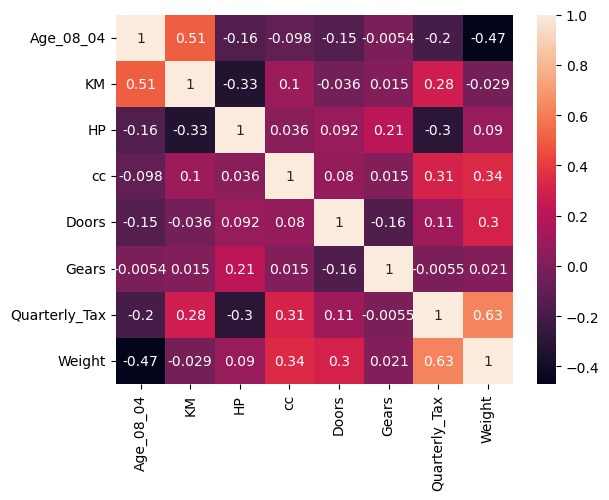

In [9]:
sns.heatmap(data=cars1.corr(),annot=True);

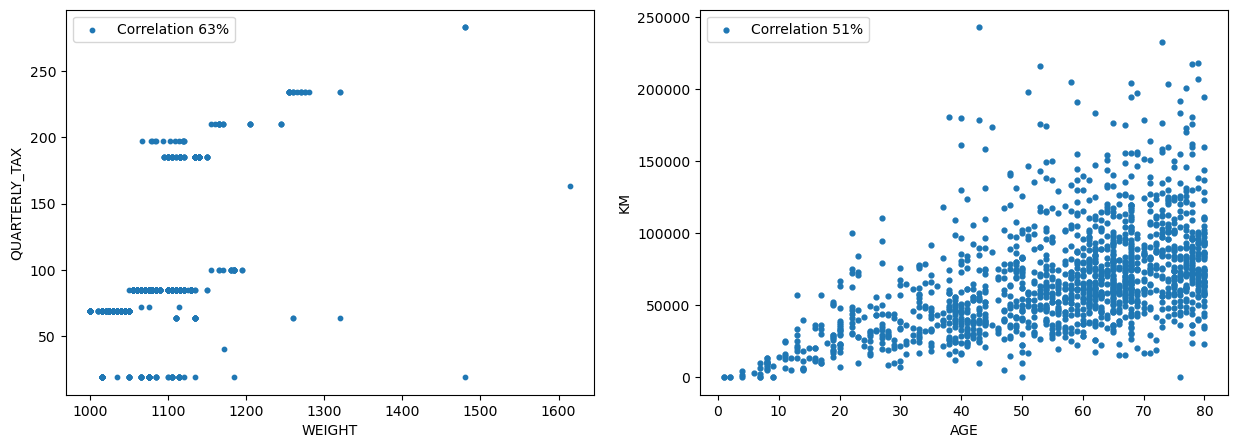

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(cars["Weight"],cars["Quarterly_Tax"],label="Correlation 63%",s=10)
plt.xlabel("WEIGHT")
plt.ylabel("QUARTERLY_TAX")
plt.legend(loc="best");


plt.subplot(1,2,2)
plt.scatter(cars["Age_08_04"],cars["KM"],label = "Correlation 51%",s=12)
plt.xlabel("AGE")
plt.ylabel("KM")
plt.legend(loc="best");


WE OBSERVE THAT AGE WEIGHT AND TAX IS  CORRELATED  AT 63% AND SO IS AGE AND KM AT 51% : 
THERE IS NO EVIDENCE OF STRONG LINEARITY

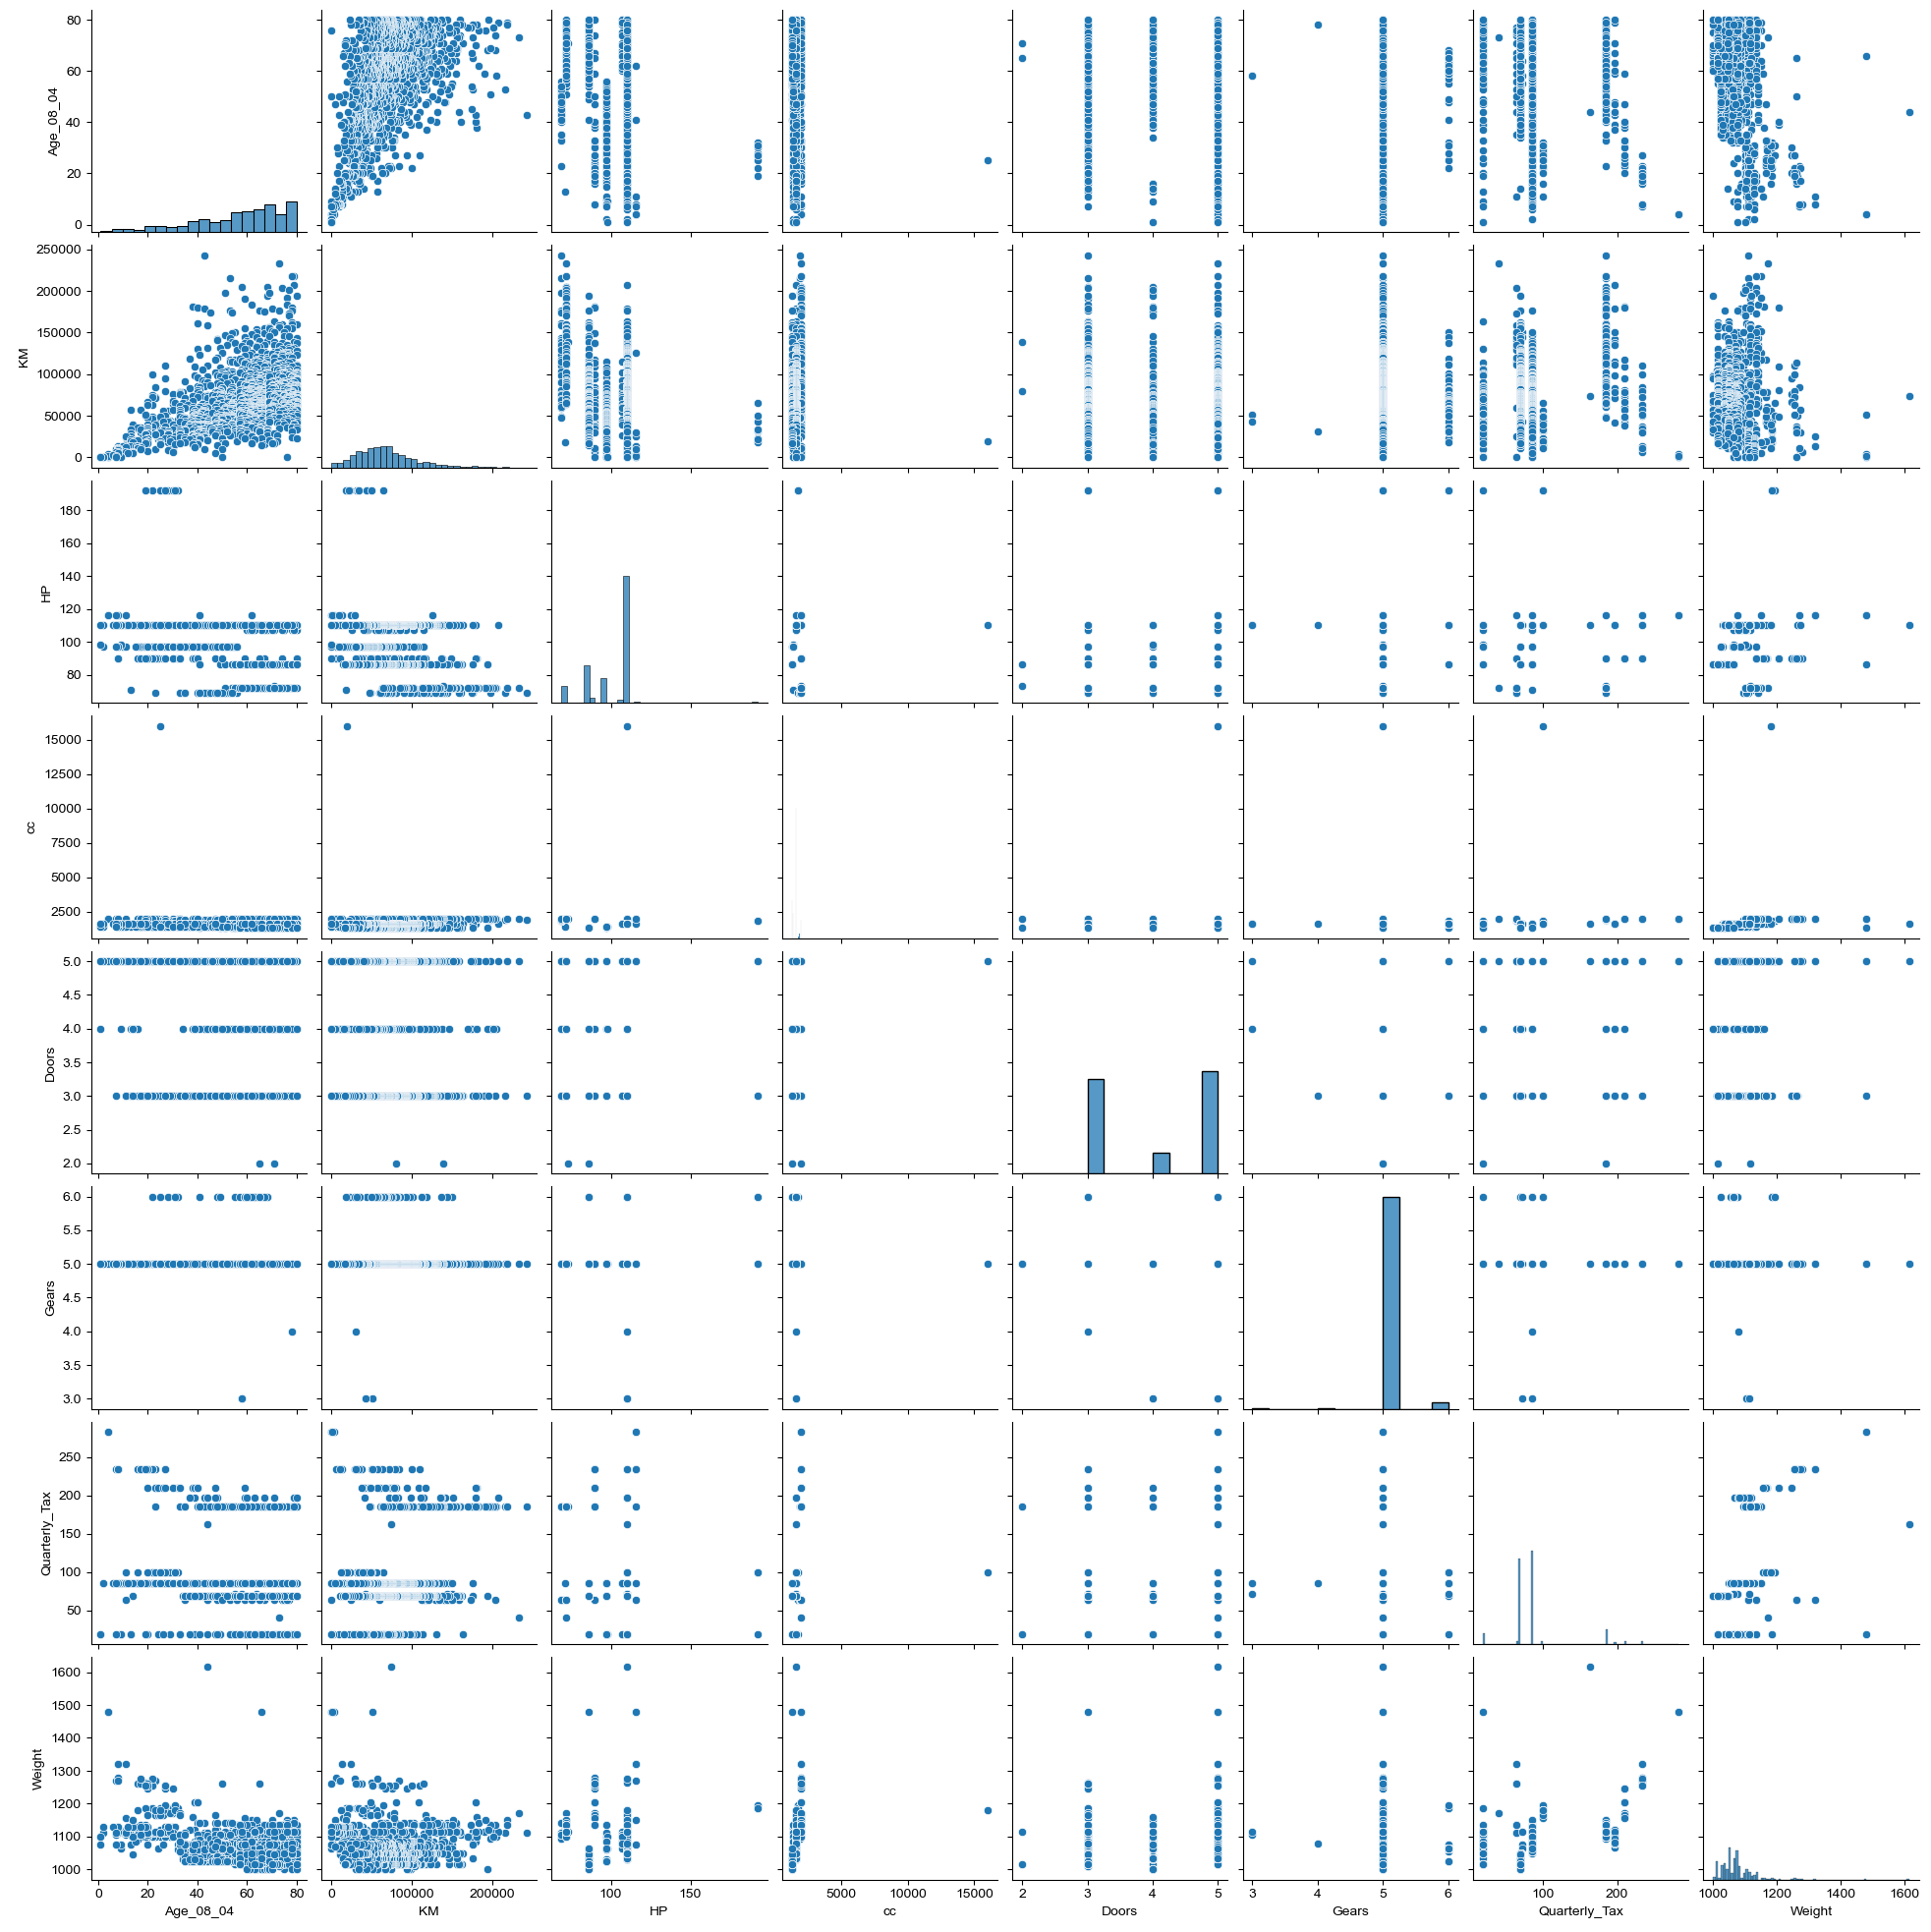

In [11]:
sns.pairplot(cars1)
sns.set_style(style ="dark")

Age_08_04


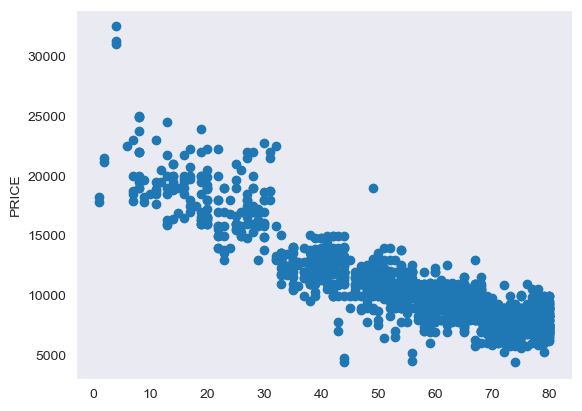

KM


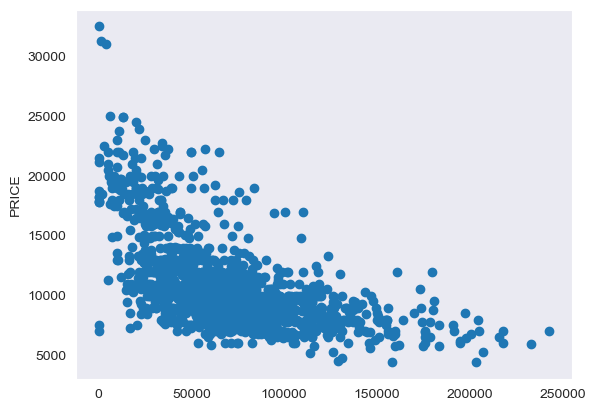

HP


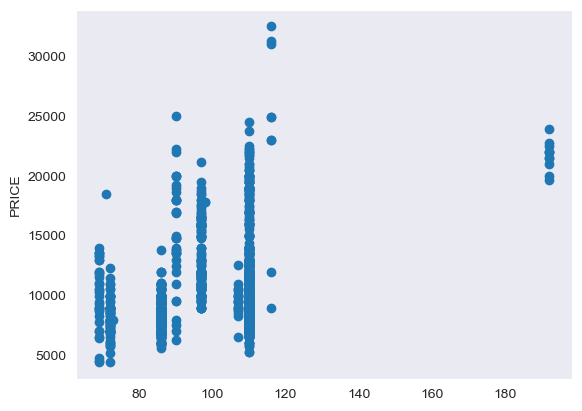

cc


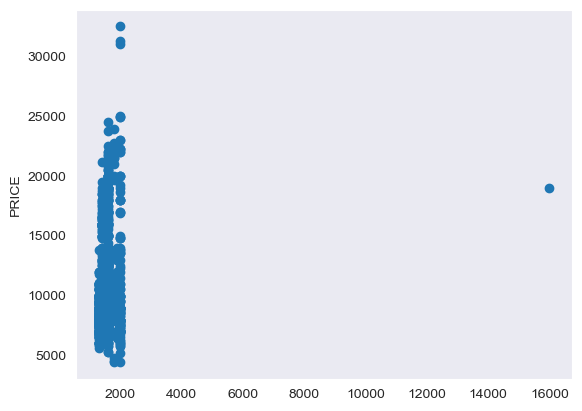

Doors


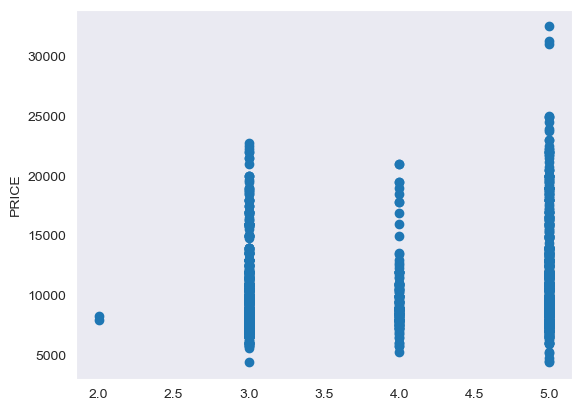

Gears


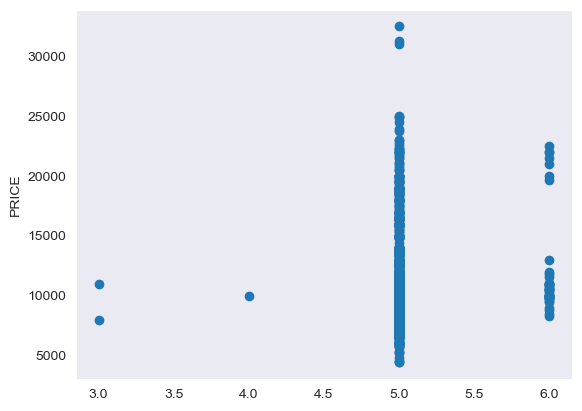

Quarterly_Tax


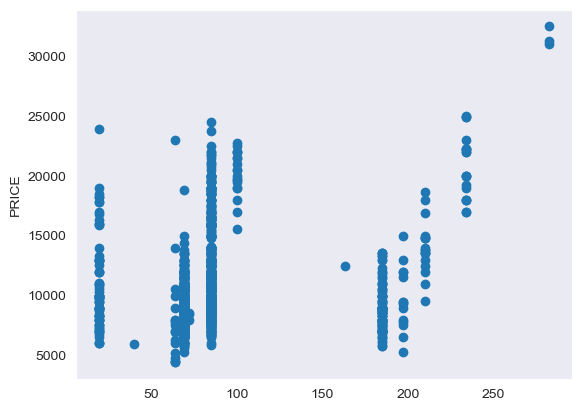

Weight


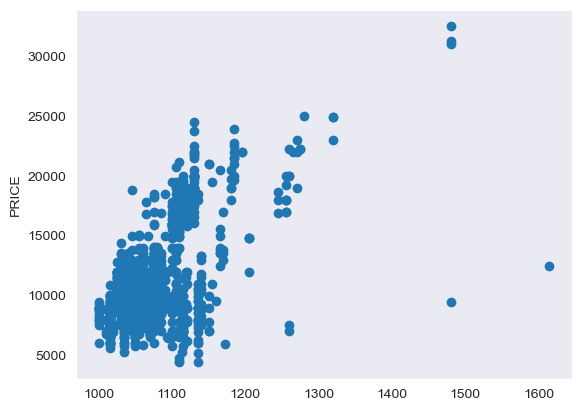

In [75]:
for i in list(cars1.columns):
              plt.scatter(cars[i],cars["Price"])
              plt.ylabel("PRICE")
              print(i);
              plt.show()

(1500.0, 2200.0)

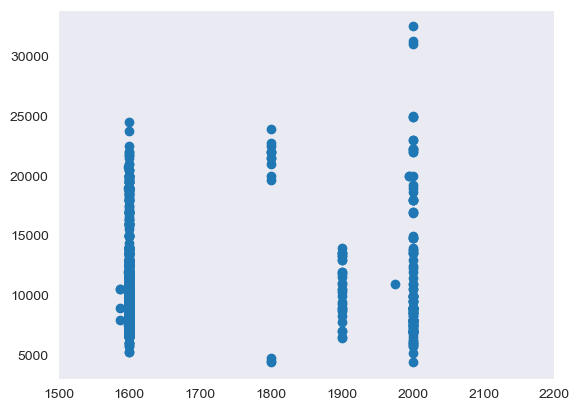

In [12]:
plt.scatter(cars["cc"],cars["Price"])
plt.xlim(1500,2200)


In [ ]:
''' AFTER CHECKING FOR LINEARITY WRT PRICE ( TARGET VARIABLE ) , WE NOTICE THE BELOW FINDINGS :

AGE VS PRICE : NEGATIVE CORRELATION 
KM VS PRICE : NEGATIVE CORRELATION 
HP VS PRICE : POSITIVE CORRELATION
CC VS PRICE : POSITIVE CORRELATION
DOORS AND GEARS  VS PRICE: UNCORRELATED 
WEIGHT VS PRICE : SOMEWHAT POSITIVE CORRELATION
QUARTERLY TAX VS PRICE : POSITIVE CORRELATION 

AS LINEAR REGRESSION IS ONLY FOR LINEAR RELATIONSHIP WE CAN CONSIDER DROPPING THE FEATURES : DOORS AND GEARS AS IT IS UNCORRELATED
WHILE BUIDLING OUR MODEL DURING TRANSFORMATIONS/IMPROVISATIONS'''

# BUILDING THE MODEL WITHOUT ANY TRANSFORMATIONS

In [13]:
model1 = smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Doors+Quarterly_Tax+Weight",data=cars).fit()

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:55:40   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:


''' BELOW ARE THE INFERENCES THAT ARE INCORRECT
CC ARE NOT NEGATIVELY CORRELATED TO THE PRICE 
DOORS ARE NOT NEGATIVELY CORRELATED
GEARS ARE NOT NEGATIVELY CORRELATED

TO THE GRAPH PLOTTED FOR EACH FEATURE AGAINST TARGET VARIABLE , THOUGH THE ACCURACY IS 86% 
THUS WE PROCEED FURTHER FOR CHECKING A COUPLE OF ASSUMPTIONS AND DOING NECESSARY TRANSFORMATIONS.
'''

' BELOW ARE THE INFERENCES THAT ARE INCORRECT\nCC ARE NOT NEGATIVELY CORRELATED TO THE PRICE \nDOORS ARE NOT NEGATIVELY CORRELATED\nGEARS ARE NOT NEGATIVELY CORRELATED\n\nTO THE GRAPH PLOTTED FOR EACH FEATURE AGAINST TARGET VARIABLE , THOUGH THE ACCURACY IS 86% \nTHUS WE PROCEED FURTHER FOR CHECKING A COUPLE OF ASSUMPTIONS AND DOING NECESSARY TRANSFORMATIONS.\n'

In [15]:
model1.rsquared

0.8637627463428192

# CALCULATING VIF FOR ALL COMBINATIONS OF FEATURES WITH HIGH CORRELATION

VIF, or Variance Inflation Factor, is a statistical measure used in the context of Multiple Linear Regression (MLR)
to assess multicollinearity among predictor variables. Multicollinearity occurs when two or more independent variables 
in a regression model are highly correlated, making it challenging to determine the individual effect of each variable 
on the dependent variable.

It measures how much the standard errors of the regression coefficients are inflated because of the presence of correlated predictors.

AS YOU CAN SEE OUR MODEL THOUGH GAVE A HIGH R2 OF 86% IS MISINTERPRETATING THE RESULTS AS THE STANDARD ERRORS ARE HIGH

If VIF is equal to 1, it indicates no multicollinearity. 

If VIF is greater than 1, it suggests some level of multicollinearity. 

The higher the VIF, the more severe the multicollinearity. 

A commonly used threshold to identify problematic multicollinearity is a VIF greater than 5 or 10.

SO HERE BY CALCULATING VIF FOR VARIOUS COMBINATIONS OF FEATURES WE DETERMINE WHICH MODEL SHOWS LOW VIF CONSIDERING THOSE FEATURES AND DROPPING THE FEATURES THAT SHOWS HIGHER VIF

In [16]:
age_model = smf.ols("Age_08_04~Weight+KM+Quarterly_Tax",data=cars).fit().rsquared
vif_age = 1/(1-age_model)

In [17]:
weight_model = smf.ols("Weight~Age_08_04+KM+Quarterly_Tax",data=cars).fit().rsquared
vif_weight = 1/(1-weight_model)

In [18]:
KM_model = smf.ols("KM~Quarterly_Tax+Age_08_04+Weight",data=cars).fit().rsquared
vif_KM = 1/(1-KM_model)

In [19]:
Tax_model = smf.ols("Quarterly_Tax~KM+Weight+Age_08_04",data=cars).fit().rsquared
vif_Tax = 1/(1-Tax_model)

In [20]:
vif_frame = pd.DataFrame({"Features":['Age','Weight','KM','Tax'],"VIF":[vif_age,vif_weight,vif_KM,vif_Tax]})

In [21]:
vif_frame

,Features,VIF
0,Age,1.881098
1,Weight,2.068997
2,KM,1.680232
3,Tax,1.939506


In [61]:
'''The VIF values for all the features are well below the commonly used thresholds of 5 or 10.
Generally, VIF values less than 5 are considered acceptable, and values between 5 and 10 
indicate moderate multicollinearity. In your case, all VIF values are below 2, which suggests 
low multicollinearity among these features. This is a positive sign because low multicollinearity
makes it easier to interpret the coefficients of these features in a regression model'''

'The VIF values for all the features are well below the commonly used thresholds of 5 or 10.\nGenerally, VIF values less than 5 are considered acceptable, and values between 5 and 10 \nindicate moderate multicollinearity. In your case, all VIF values are below 2, which suggests \nlow multicollinearity among these features. This is a positive sign because low multicollinearity\nmakes it easier to interpret the coefficients of these features in a regression model'

# HENCE WE DONT HAVE TO TREAT FOR MULTICOLLINEARITY AS THE VIF IS LOW

#  Assumption 2 : Residual Analysis

In [23]:
# THE QQ PLOT AND THE HISTOGRAM SHOULD PROVIDE A NORMAL DISTRIBUTION OF WITH THE MEAN OF 0

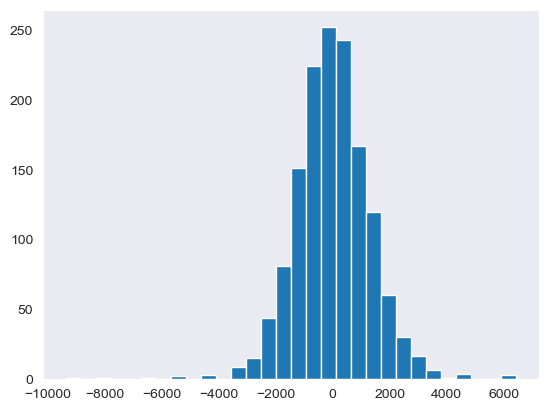

In [22]:
plt.hist(model1.resid,bins=30);

In [91]:
#THIS SHOWS THAT THE MAJORITY OF THE ERRORS IS CLOSER TO MEAN : 0 AND IS A PROPER SHAPED BELL CURVE
    
''' the residuals should be close to zero because they represent the prediction errors. When residuals are closer to zero, 
it means the model is doing a better job of explaining the variance in the data'''

' the residuals should be close to zero because they represent the prediction errors. When residuals are closer to zero, \nit means the model is doing a better job of explaining the variance in the data'

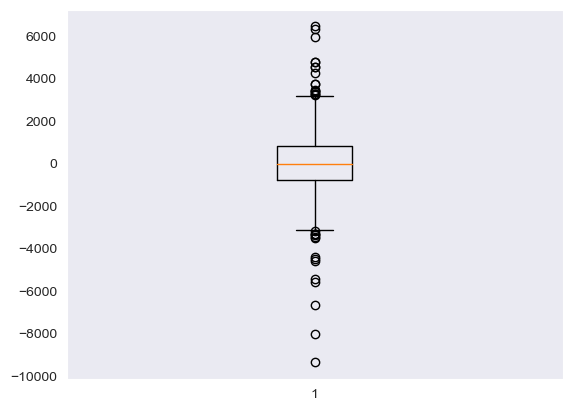

In [23]:
plt.boxplot(model1.resid);
# SO DOES THE BOXPLOT SHOWS THAT THE MEAN FALLS EXACTLY AT 0 AND THE 2 SIDES ARE SYMMETRIC

In [ ]:
''' Q-Q plot is a graphical tool that helps you visually assess whether a dataset conforms 
to a particular theoreticaldistribution by comparing the quantiles of the observed data to those of the
expected distribution. 

Q-Q plots are especially useful for identifying departures from normality, which can be important in various statistical 
analyses. However, they can also be used to compare data to other theoretical distributions, 
such as the exponential or uniform distribution '''

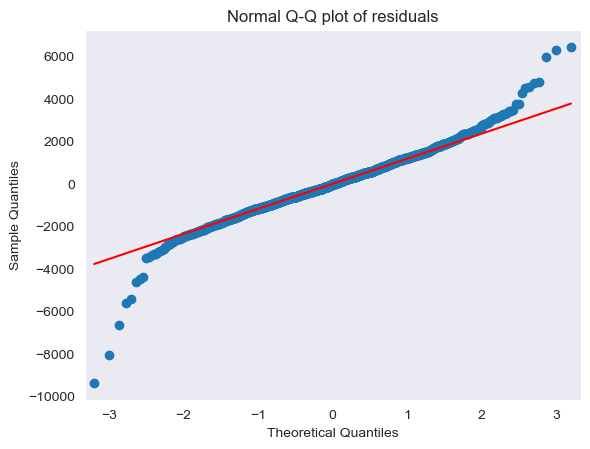

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# HENCE THE ASSUMPTION OF RESIDUAL ANALYSIS WHERE THE ERROR MUST HAVE THE MEAN OF 0 IS SATISFIED

# Assumption 3:  Checking for Homoscedasticity


Creating a scatterplot of standardized values of the fitted values (predicted values) and the residuals
(prediction errors) from the model. This scatterplot is often referred to as a "residual plot,"

If the scatterplot shows no clear pattern, and the points are randomly scattered around a horizontal line, 
it suggests that the assumption of homoscedasticity is met.

Variance of the residuals is approximately constant.

Firstly we must STANDARISED THE VALUES FOR PLOTTING.

In [25]:
def standardised_values(vals):
    return (vals - vals.mean())/vals.std()  # calculates their z-scores (standardized values)

''' Z SCORE = (X - MEAN/SD) : BUT WHY STANDARDISE ? 

#By standardizing both the predicted values and residuals, you can more easily identify patterns or deviations. 
It is ideal for the plot to be scattered randomly without any variation in the errors , 

# If the spread of residuals are widening or narrowing systematically as the predicted values increase or decrease,
it suggests the presence of heteroscedasticity '''
 

' Z SCORE = (X - MEAN/SD) : BUT WHY STANDARDISE ? \n\n#By standardizing both the predicted values and residuals, you can more easily identify patterns or deviations. \nIt is ideal for the plot to be scattered randomly without any variation in the errors , \n\n# If the spread of residuals are widening or narrowing systematically as the predicted values increase or decrease,\nit suggests the presence of heteroscedasticity '

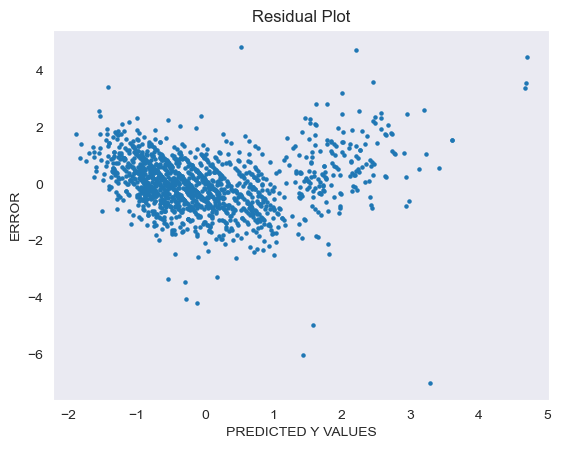

In [94]:
plt.scatter(standardised_values(model1.fittedvalues),standardised_values(model1.resid),s=5)
plt.title("Residual Plot")
plt.xlabel("PREDICTED Y VALUES")
plt.ylabel("ERROR")
plt.show()

# AS THERE IS NOT MUCH VARIATION IN THE ERRORS HOMOSCEDASTICITY IS ALSO SATISFIED

# Assumption 4 : Error and Feature should be independent

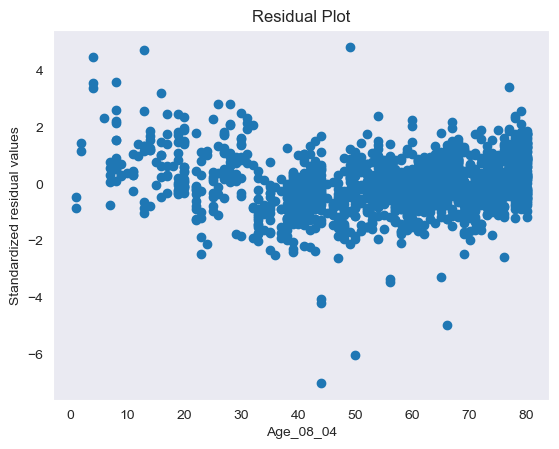

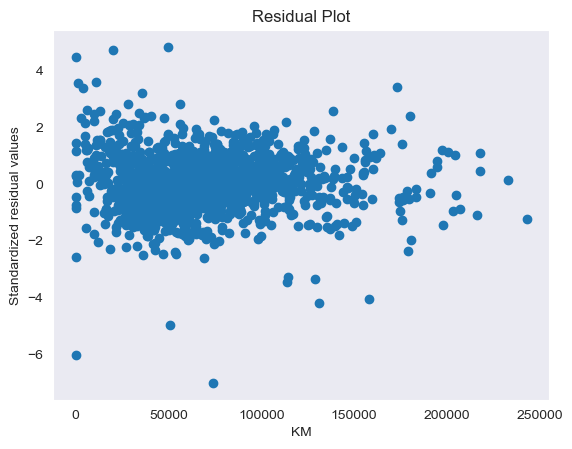

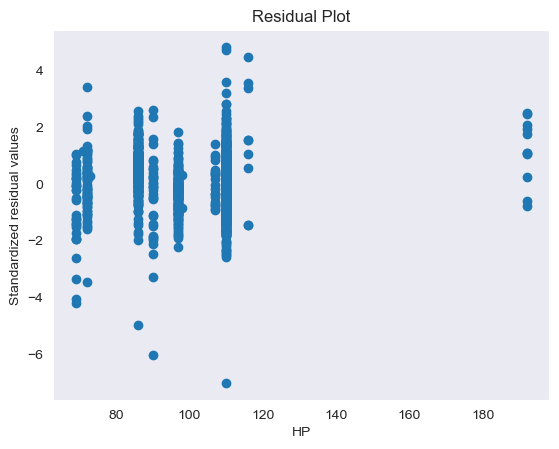

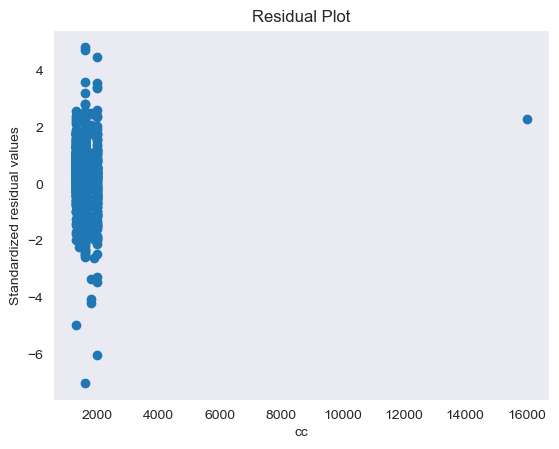

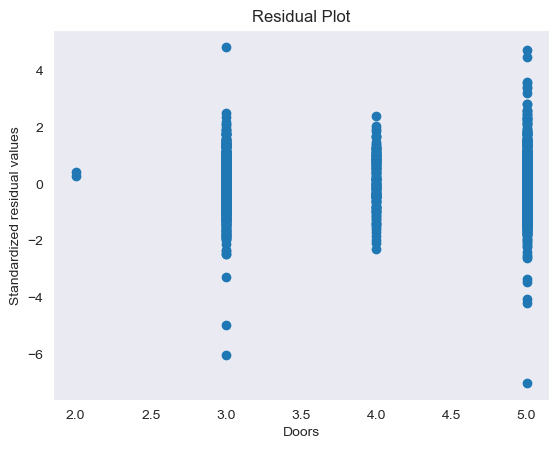

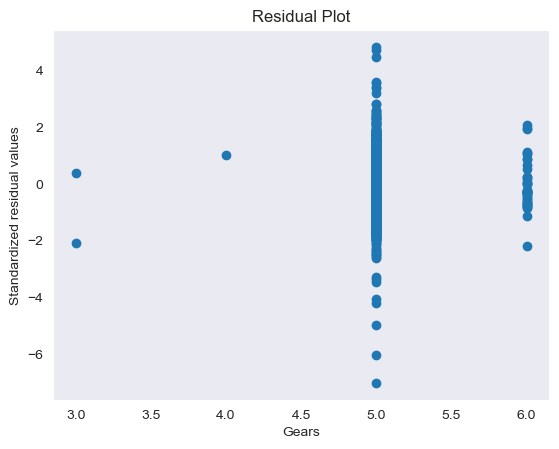

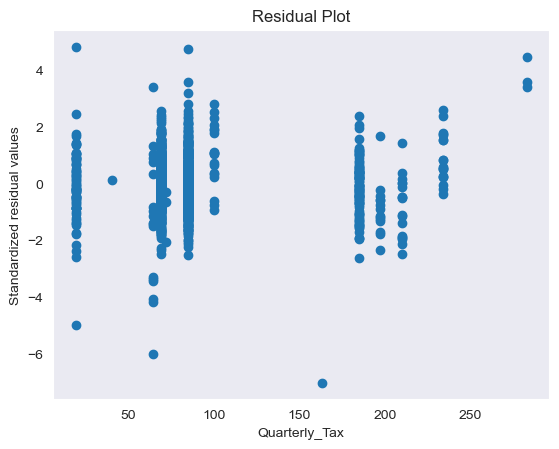

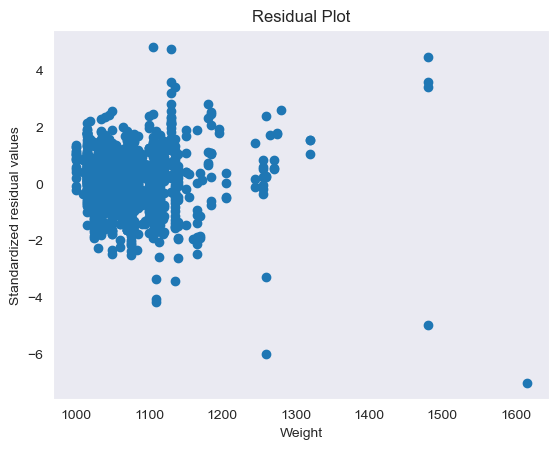

In [26]:
cars = data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
cols = list(cars.columns)

for i in cols:
    plt.scatter(cars[i],standardised_values(model1.resid))
    plt.title('Residual Plot')
    plt.xlabel(i)
    plt.ylabel('Standardized residual values')
    plt.show()

In [37]:
'''AS OBSERVED THE ERRORS ARE INDEPENDENT OF THE FEATURES'''

'AS OBSERVED THE ERRORS ARE INDEPENDENT OF THE FEATURES'

# Cook's Distance

In [27]:
model1_influence = model1.get_influence()
(c,_) = model1_influence.cooks_distance

In [28]:
cars1.shape

(1436, 8)

In [29]:
y = 9*8/1436
y

0.05013927576601671

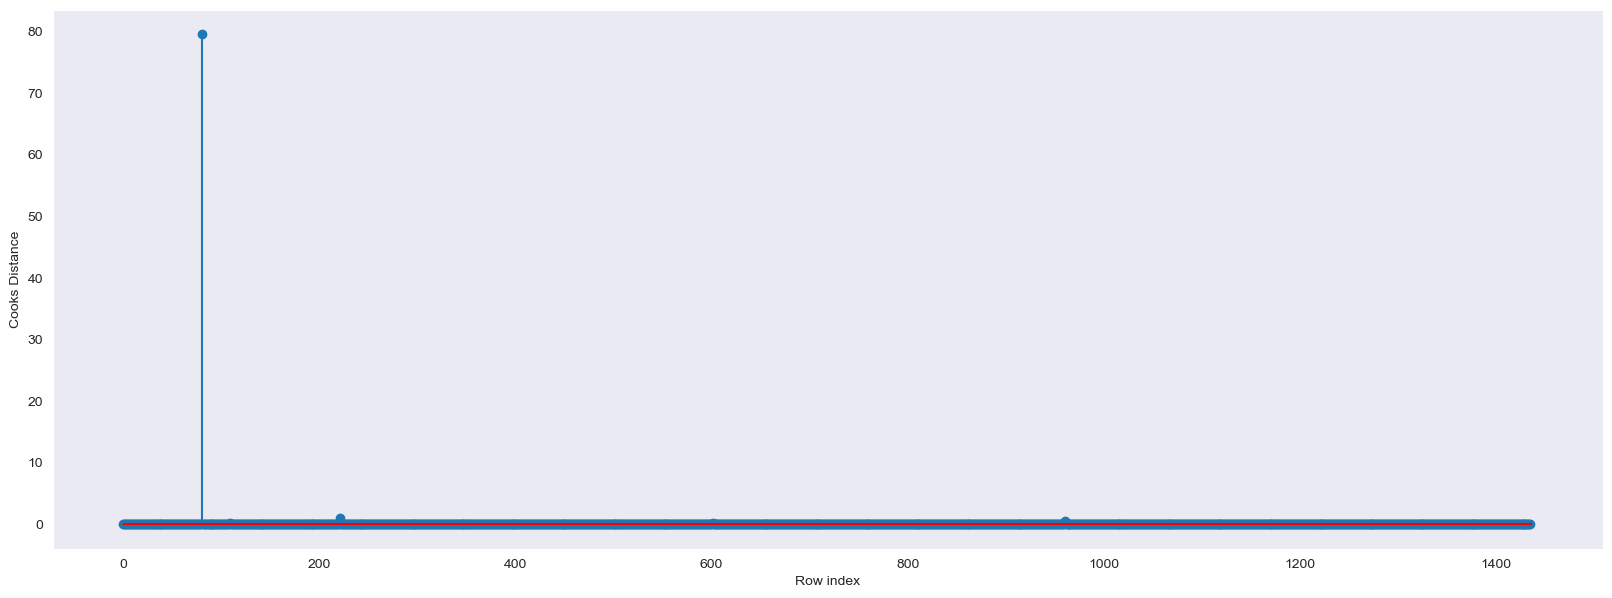

In [30]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 2))
plt.hlines(y=0.05,xmin=0,xmax=1437,color="red")
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
data.shape

(1436, 38)

In [32]:
np.where(c>=0.05013927576601671)

(array([ 80, 109, 110, 111, 221, 601, 960, 991], dtype=int64),)

In [33]:
carsfinal = pd.read_csv("ToyotaCorolla_data.csv",encoding='latin1')

In [34]:
carsfinal1 = data[["Price","Age_08_04","KM","HP","cc","Quarterly_Tax","Weight"]]

In [35]:
carsfinal1.head()

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,210,1165
1,13750,23,72937,90,2000,210,1165
2,13950,24,41711,90,2000,210,1165
3,14950,26,48000,90,2000,210,1165
4,13750,30,38500,90,2000,210,1170


In [ ]:
'''_ is used as a convention to "throw away" or
ignore the second element of the tuple returned by model1_influence.cooks_distance. 
This is often done when you are interested in only one value from a function that returns a tuple of multiple values.

In [47]:
model2 = smf.ols("np.log(Price)~np.sqrt(Age_08_04)+KM+HP+cc+Quarterly_Tax+Weight",data=carsfinal1).fit()

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Price)   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1289.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:57:43   Log-Likelihood:                 1044.3
No. Observations:                1436   AIC:                            -2075.
Df Residuals:                    1429   BIC:                            -2038.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.4255      0.099     95.137      0.000       9.231       9.620
np.sqrt(Age_08_04)    -0.1345      0.003    -44.705      0.000      -0.140      -0.129
KM                  -1.97e-06    1.1e-07    -17.960      0.000   -2.19e-06   -1.75e-06
HP                     0.0030      0.000     12.666      0.000       0.003       0.003
cc                 -7.291e-07   7.87e-06     -0.093      0.926   -1.62e-05    1.47e-05
Quarterly_Tax          0.0008      0.000      6.784      0.000       0.001       0.001
Weight                 0.0005   9.23e-05      5.631      0.000       0.000       0.001
==============================================================================
Omnibus:                      161.957   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              485.225
Skew:                          -0.575   Prob(JB):                    4.31e-106
Kurtosis:                       5.606   Cond. No.                     2.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
model3 = smf.ols("np.sqrt(Price)~np.sqrt(Age_08_04)+pow(KM,2)+np.cbrt(HP)+np.log(cc)+np.sqrt(Quarterly_Tax)+Weight",data=carsfinal1).fit()

In [50]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(Price)   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1604.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:58:01   Log-Likelihood:                -4558.7
No. Observations:                1436   AIC:                             9131.
Df Residuals:                    1429   BIC:                             9168.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 87.8021     10.045      8.741      0.000      68.097     107.507
np.sqrt(Age_08_04)        -7.8541      0.137    -57.516      0.000      -8.122      -7.586
pow(KM, 2)             -4.462e-10   2.77e-11    -16.094      0.000   -5.01e-10   -3.92e-10
np.cbrt(HP)               10.0979      0.802     12.595      0.000       8.525      11.671
np.log(cc)                -4.8560      1.615     -3.007      0.003      -8.024      -1.688
np.sqrt(Quarterly_Tax)     0.6904      0.109      6.343      0.000       0.477       0.904
Weight                     0.0534      0.005     11.781      0.000       0.045       0.062
==============================================================================
Omnibus:                      101.625   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.467
Skew:                          -0.239   Prob(JB):                     5.38e-84
Kurtosis:                       5.486   Cond. No.                     6.13e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
model4 = smf.ols("np.sqrt(Price)~np.sqrt(Age_08_04)+(KM)+np.cbrt(HP)+np.log(cc)+np.sqrt(Quarterly_Tax)+Weight",data=carsfinal1).fit()

In [53]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(Price)   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1600.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:58:18   Log-Likelihood:                -4560.1
No. Observations:                1436   AIC:                             9134.
Df Residuals:                    1429   BIC:                             9171.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 88.3605     10.050      8.792      0.000      68.646     108.075
np.sqrt(Age_08_04)        -7.4200      0.149    -49.707      0.000      -7.713      -7.127
KM                     -8.875e-05   5.55e-06    -15.990      0.000   -9.96e-05   -7.79e-05
np.cbrt(HP)               10.6911      0.791     13.510      0.000       9.139      12.243
np.log(cc)                -5.2725      1.611     -3.273      0.001      -8.433      -2.112
np.sqrt(Quarterly_Tax)     0.7402      0.109      6.771      0.000       0.526       0.955
Weight                     0.0529      0.005     11.663      0.000       0.044       0.062
==============================================================================
Omnibus:                       99.596   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.098
Skew:                          -0.257   Prob(JB):                     2.12e-77
Kurtosis:                       5.374   Cond. No.                     5.17e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
model_frame = pd.DataFrame({"MODELS" : ["MODEL1","MODEL2","MODEL3","MODEL4"],"R_SQAURED" :[model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared]})

In [57]:
model_frame

,MODELS,R_SQAURED
0,MODEL1,0.863763
1,MODEL2,0.844064
2,MODEL3,0.870724
3,MODEL4,0.870467
